# Naive Persistence Models (Daily, Weekly & Yearly) 

## Preparations

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from evaluation_functions import (evaluate_forecasts, evaluate_model, 
                                  summarize_scores)  # evaluation functions
from persistence_functions import (daily_persistence, weekly_persistence, 
                                   yearly_persistence)  # pm functions

In [2]:
%reload_ext autoreload
%autoreload 2
dir_data = '../data/power_consumption/'
plt.style.use(['dark_background'])

In [3]:
# create dedicated locations for saving
for folder in ['rmse', 'predictions']:
    if not os.path.exists(dir_data+folder+'/'):
        os.makedirs(dir_data+folder+'/')

# Load Dataset

In [4]:
test_X = np.load(dir_data+'test_Xs.npy')[:,:,:1]
test_y = np.load(dir_data+'test_ys.npy')

In [5]:
print(test_X.shape)
print(test_y.shape)

(59, 14, 1)
(59, 7)


# Run Naive Model (Daily and Weekly)

dpm: [521.890] 584.3, 471.6, 474.4, 496.1, 476.7, 526.0, 606.4
wpm: [474.974] 449.2, 421.5, 474.6, 473.8, 362.0, 501.4, 606.4
ypm: [495.389] 476.3, 412.8, 547.5, 491.1, 407.4, 584.9, 521.2


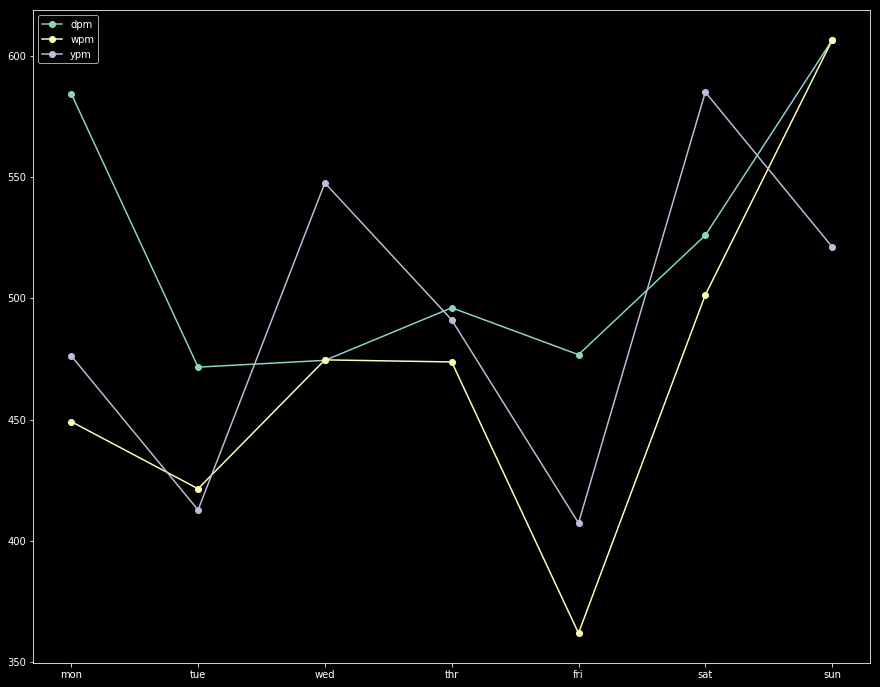

In [6]:
# define the names and functions for the models we wish to evaluate
models = dict()
models['dpm'] = daily_persistence
models['wpm'] = weekly_persistence
models['ypm'] = yearly_persistence
# models['ypm'] = yearly_persistence
# evaluate each model
days = ['mon', 'tue', 'wed', 'thr', 'fri', 'sat', 'sun']
plt.figure(figsize=(15, 12))
for name, func in models.items():
    # evaluate and get scores
    score, scores, predictions = evaluate_model(func, test_X, test_y)
    # summarize scores
    summarize_scores(name, score, scores)
    # plot scores
    plt.plot(days, scores, marker='o', label=name)
    # save rmse & predictions as npy files
    np.save(dir_data+'rmse/rmse_'+name, scores)
    np.save(dir_data+'predictions/preds_'+name, predictions)
# show plot
plt.legend()
plt.savefig('plots/pm_comparison.png')
plt.show()